# CISB63
## Final Project

### Chatbot
For the final project, I decided to alter the chatbot shown for lack of time.
To address the issues regarding the example chatbot's ability to take in input that might not be
in the exact format that it wants, such as including unwanted punctuation, I decided
to alter the basis of it to work with the Pipeline we had learned a little while back.
This succeeds in functioning a bit nicer for the end-user, but also heavily reduced the amount of code to go through when making changes. 

## Imports

- os and yaml are used for reading the files from the data folder
- Pipeline, MultinomialNB, CountVectorizer and TfidfTransformer are used to fuel the pipeline
- random is to allow for the bot to choose between varied responses for the same question
- WordCloud is to have an end wordcloud based off of the output from the bot after use.

In [1]:
import os 
import yaml 
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import random
from wordcloud import WordCloud
from nltk.corpus import stopwords
en_stopwords = set(stopwords.words('english'))

## Preprossesing

Process the data from yaml files retrieved from the data folder
- questions list holds the questions that will be used by the pipeline to process user input.
- answerIndex is what the chatbot actually gets trained on for responses. This allows the mapping of multiple responses for each input by using a randomized choice on that index.
- answerTemp stores all the responses for a given question, and is then copied/appended into answers array itself.
- answers is a 2d array that stores all responses utilized by the chatbot.
 


In [2]:
#data extracted from https://github.com/shubham0204/Dataset_Archives/blob/master/chatbot_nlp.zip
dir_path = 'data'
files_list = os.listdir(dir_path + os.sep)

questions = list()
answerIndex = list()
answerTemp = list()
answers = []
i = 0

#Opens file paths to read data
for filepath in files_list:
    stream = open( dir_path + os.sep + filepath , 'rb')
    docs = yaml.safe_load(stream)
    #Each question/response(s) pair is coded as a conversation and is read seperately
    conversations = docs['conversations']
    for con in conversations:
        ans=''
        answerIndex.append(i)
        #If there is more than one response, they are appended into answersTemp
        if len( con ) > 2 :
            questions.append(con[0])
            replies = con[1 : ]
            ans = ''
            for rep in replies:
                answerTemp.append(rep)
            
            #answersTemp is copied/appended into answers so they are on the same index
            answers.append(answerTemp[:])
            answerTemp.clear() 
            i += 1
        #If only one response, simple appends is all that is needed
        elif len( con )> 1:
            questions.append(con[0])
            answers.append(con[1])
            i += 1



## Pipeline creation

- CountVecorizer will help create a BOW representation of our dataset, allowing for easier manipulation and machine understanding.
- TfidfTransformer allows us to give every word in our BOW representation an idf score. With that we can understand which words are the most unique, and matter most when deciphering which input the user may be trying to imitate. 
- MultinomialNB is our probablistic learning method that is based on the Bayes theorem, and helps predict probabilities of matching tags between input, and the questions the model was trained on.

In [3]:
#Creation of chatbot pipeline
text_clf = Pipeline([
    ('BOW', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

Here we simply fit the questions, and the Indexes of all answers to our pipeline.

In [4]:
text_clf.fit(questions, answerIndex)

Pipeline(steps=[('BOW', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

## Chatbot code

This is the code for the chatbot to actually run. The only unusual thing present here is how it checks whether there is more than one viable answer. If only one answer exists, querying the first index in the second dimension will return the first char of said response, which would always have a size of one. If there are multiple options, an entire sentence will exist at the first index of the second dimension, which will always have a size of greater than one(It wouldn't be a very good sentence if it was only one character).

It also saves the bot's output, that way we can have a fun little wordcloud that summarizes the responses of the chatbot post run.

In [5]:
userInput =''
output=''
convoStrings = ''

print("Please feel free to talk with the chatbot. Say 'Goodbye' when finished. ")
while (output != 'See you later!'):
    userInput = input()
    userInputFormatted = [userInput]
    predict = text_clf.predict(userInputFormatted)
    #If there is more than one possible answer, the chatbot will choose one at random.
    if len(answers[predict[0]][0]) > 1:
        output = random.choice(answers[predict[0]])
    else:
        output = answers[predict[0]]
    print(output)
    convoStrings = convoStrings + output + userInput

Please feel free to talk with the chatbot. Say 'Goodbye' when finished. 
Hello
Hi
How are you?
Good.
You seem crazy
yep.  i always behave in socially unacceptable ways.
Are you happy?
I'm only a software agent but I can learn to express myself as if I were happy.
Tell me a joke
what do you get when you cross sour music and an assistant?
Tell me a joke
what do you get when you cross a dog and sandpaper?
tell me a joke
What do you get when you cross finals and a chicken? Eggs-ams.
what is humour
An emotion associated with laughter.
What operating system do you like?
I like to chat with people. I find it stimulating.
what os
Not too much.
What programming language are you?
I quite enjoy programming in Python these days.
Why Python?
Artificial Intelligence is the branch of engineering and science devoted to constructing machines that think.
That's not what I asked
What does that make me?
You're psycho
you are crazy.
Goodbye
See you later!


Lastly, just for fun, here is a little WordCloud of how the conversation went, showcasing words most used during discussion.

(-0.5, 399.5, 199.5, -0.5)

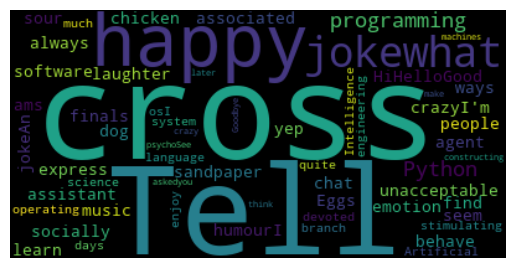

In [6]:
#wordcloud generates here
wordcloud = WordCloud().generate(convoStrings)
# Display the generated image:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


## Conclusion

After seeing the Seq2Seq example for the chatbot, I really wanted to see the difference in usability and updatability between something like that, and the Pipeline like this that we worked with earlier on. This Pipeline trains much faster than  the Seq2Seq version, automatically accounts for things that won't matter so much, such as stopwords, grammar, etc. And takes much less code, allowing one to focus much more on implementation of various other capabilities. I am left feeling like this pipeline is particularly strong when it comes to fast timelines. I can see Seq2Seq leading to a much more robust chatbot with much more fine tuning and work put into it, but the simplicity of this pipeline allows a turnaround time that just simply would not be possible as long as your project allows its usage.